<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/gradientxgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
Cl = '/content/cs-longia.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-5.366667,35

In [4]:
X = data.loc[:, data.columns != 'Cs_longia']
Y = data.Cs_longia

In [5]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,95,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-

In [6]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
249    1
250    1
251    1
252    1
253    1
Name: Cs_longia, Length: 254, dtype: int64

In [7]:
def tp(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)    

In [8]:
 from sklearn.feature_selection import SelectFromModel,RFECV
 from sklearn.model_selection import StratifiedKFold
 from sklearn.neural_network import MLPClassifier

# 10 kfold

In [9]:
rfecv1= RFECV(GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=1, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),cv=StratifiedKFold(10))
rfecv1.fit(X,Y)
# check the support
rfecv1.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [10]:
# name wise features and count
feature_selected1 =  X.columns[rfecv1.get_support()]
feature_selected1

Index(['Min_IRM', 'Amp1_TempJ', 'Max_TempN', 'VarT_ann_NDVI', 'Var_EVI',
       'ProfAbs_Sub', 'IR_Moy', 'Rad_Mai', 'Tmax_Fev', 'Tmax_Avril'],
      dtype='object')

In [11]:
 x_rfe1=X[feature_selected1]

In [12]:
 x_rfe1

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
0,2690,96,14561,2,1,4143,1.968750,24920,21.799999,22.600000
1,3350,312,14705,13,0,1828,1.375000,24082,22.600000,24.600000
2,3350,312,14705,13,0,1828,1.375000,24082,22.600000,24.600000
3,2930,306,14690,8,0,0,9.304688,24019,22.600000,24.600000
4,2350,295,14719,1,35,6537,7.515625,24002,22.799999,24.700001
...,...,...,...,...,...,...,...,...,...,...
249,880,543,14675,52,47,0,25.093750,23341,15.400000,18.900000
250,1400,478,14743,51,7,846,6.578125,23582,15.500000,18.700001
251,1080,452,14666,84,70,1729,15.914062,23425,15.500000,18.900000
252,620,0,0,37,40,2786,14.812500,23716,17.100000,19.799999


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

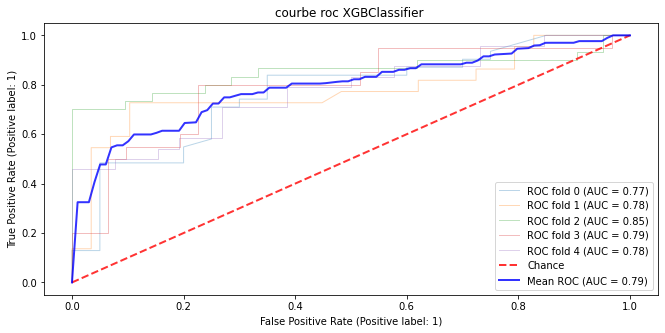

Accuracy: [0.66666667 0.64705882 0.80392157 0.76470588 0.7       ]
moy_accuracy: 0.72
precision: [0.79166667 0.57142857 0.88461538 0.66666667 0.65517241]
moy_precision: 0.71
sensibilité : [0.61290323 0.72727273 0.76666667 0.8        0.79166667]
moy_sensibilité: 0.74
spécificité : [0.75       0.5862069  0.85714286 0.74193548 0.61538462]
moy_spécificité: 0.71
MCC : [0.35497615 0.3120159  0.61413747 0.53009771 0.41203374]
MCC: 0.44
balanced_accuracy : [0.68145161 0.65673981 0.81190476 0.77096774 0.70352564]
balanced_accuracy: 0.72
roc_auc : [0.76854839 0.77664577 0.84920635 0.79193548 0.77564103]
roc_auc: 0.79
cohen_kappa_scorec : [0.34168565 0.30349014 0.60648148 0.52336449 0.40381558]
cohen_kappa_scorec: 0.44
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

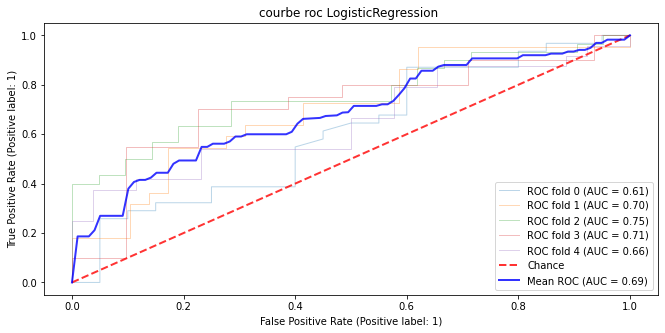

Accuracy: [0.50980392 0.64705882 0.66666667 0.70588235 0.66      ]
moy_accuracy: 0.64
precision: [0.6875     0.57142857 0.70967742 0.64705882 0.68421053]
moy_precision: 0.66
sensibilité : [0.35483871 0.72727273 0.73333333 0.55       0.54166667]
moy_sensibilité: 0.58
spécificité : [0.75       0.5862069  0.57142857 0.80645161 0.76923077]
moy_spécificité: 0.70
MCC : [0.11031219 0.3120159  0.30720983 0.36917519 0.32000133]
MCC: 0.28
balanced_accuracy : [0.55241935 0.65673981 0.65238095 0.67822581 0.65544872]
balanced_accuracy: 0.64
roc_auc : [0.61129032 0.70219436 0.75396825 0.71451613 0.65544872]
roc_auc: 0.69
cohen_kappa_scorec : [0.09252669 0.30349014 0.30695444 0.36619718 0.31340872]
cohen_kappa_scorec: 0.28
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

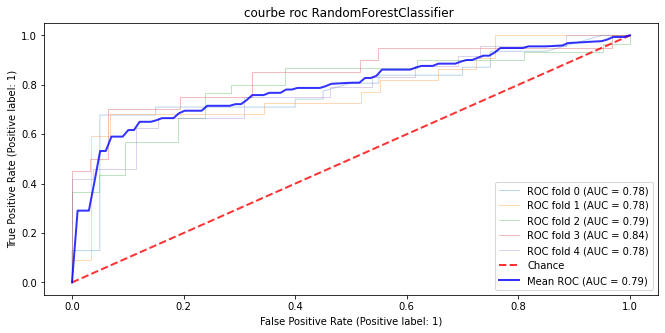

Accuracy: [0.74509804 0.62745098 0.7254902  0.76470588 0.7       ]
moy_accuracy: 0.71
precision: [0.95       0.55172414 0.83333333 0.68181818 0.66666667]
moy_precision: 0.74
sensibilité : [0.61290323 0.72727273 0.66666667 0.75       0.75      ]
moy_sensibilité: 0.70
spécificité : [0.95       0.55172414 0.80952381 0.77419355 0.65384615]
moy_spécificité: 0.75
MCC : [0.56290323 0.27899687 0.46953014 0.51674606 0.40482045]
MCC: 0.45
balanced_accuracy : [0.78145161 0.63949843 0.73809524 0.76209677 0.70192308]
balanced_accuracy: 0.72
roc_auc : [0.77822581 0.78056426 0.79365079 0.84193548 0.78365385]
roc_auc: 0.80
cohen_kappa_scorec : [0.51285819 0.26867925 0.456621   0.51505547 0.40191388]
cohen_kappa_scorec: 0.43
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

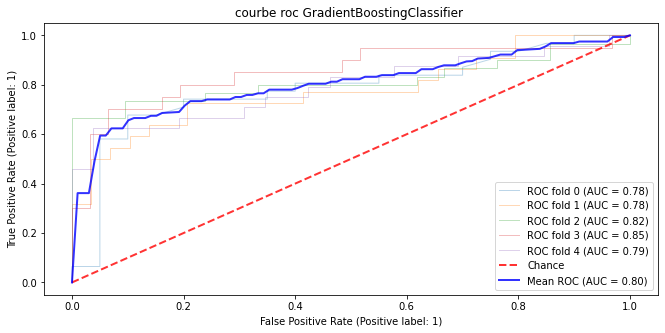

Accuracy: [0.74509804 0.7254902  0.80392157 0.80392157 0.66      ]
moy_accuracy: 0.75
precision: [0.84615385 0.66666667 1.         0.72727273 0.62068966]
moy_precision: 0.77
sensibilité : [0.70967742 0.72727273 0.66666667 0.8        0.75      ]
moy_sensibilité: 0.73
spécificité : [0.8        0.72413793 1.         0.80645161 0.57692308]
moy_spécificité: 0.78
MCC : [0.49777669 0.44791401 0.67202151 0.59783545 0.33092473]
MCC: 0.51
balanced_accuracy : [0.75483871 0.72570533 0.83333333 0.80322581 0.66346154]
balanced_accuracy: 0.76
roc_auc : [0.78467742 0.77899687 0.81587302 0.85322581 0.79326923]
roc_auc: 0.81
cohen_kappa_scorec : [0.48803089 0.44651163 0.62222222 0.59587956 0.32432432]
cohen_kappa_scorec: 0.50
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

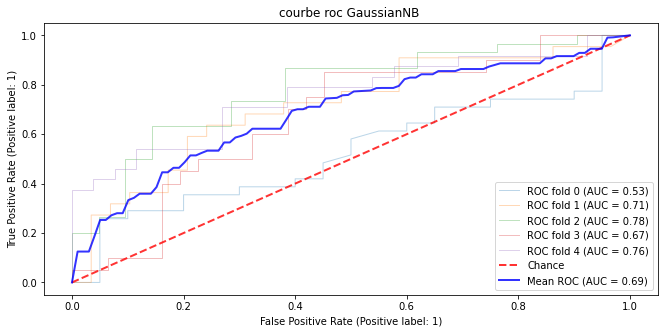

Accuracy: [0.54901961 0.43137255 0.66666667 0.62745098 0.68      ]
moy_accuracy: 0.59
precision: [0.64285714 0.42857143 0.66666667 0.51724138 0.64285714]
moy_precision: 0.58
sensibilité : [0.58064516 0.95454545 0.86666667 0.75       0.75      ]
moy_sensibilité: 0.78
spécificité : [0.5        0.03448276 0.38095238 0.5483871  0.61538462]
moy_spécificité: 0.42
MCC : [ 0.07912819 -0.02799463  0.2872972   0.29414776  0.36774959]
MCC: 0.20
balanced_accuracy : [0.54032258 0.49451411 0.62380952 0.64919355 0.68269231]
balanced_accuracy: 0.60
roc_auc : [0.52580645 0.71081505 0.77936508 0.66935484 0.75641026]
roc_auc: 0.69
cohen_kappa_scorec : [ 0.0785546  -0.00955631  0.26463104  0.27632562  0.36305732]
cohen_kappa_scorec: 0.19
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

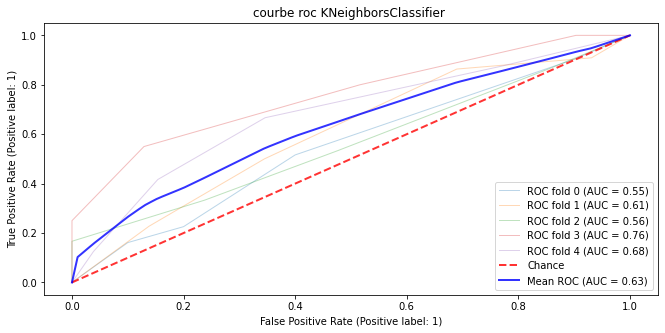

Accuracy: [0.45098039 0.58823529 0.50980392 0.74509804 0.64      ]
moy_accuracy: 0.59
precision: [0.63636364 0.52380952 0.66666667 0.73333333 0.71428571]
moy_precision: 0.65
sensibilité : [0.22580645 0.5        0.33333333 0.55       0.41666667]
moy_sensibilité: 0.41
spécificité : [0.8        0.65517241 0.76190476 0.87096774 0.84615385]
moy_spécificité: 0.79
MCC : [0.03063358 0.15615453 0.1028689  0.45107399 0.29243967]
MCC: 0.21
balanced_accuracy : [0.51290323 0.57758621 0.54761905 0.71048387 0.63141026]
balanced_accuracy: 0.60
roc_auc : [0.5516129  0.60579937 0.56269841 0.75806452 0.68028846]
roc_auc: 0.63
cohen_kappa_scorec : [0.02191781 0.15602837 0.08602151 0.44050633 0.26710098]
cohen_kappa_scorec: 0.19
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

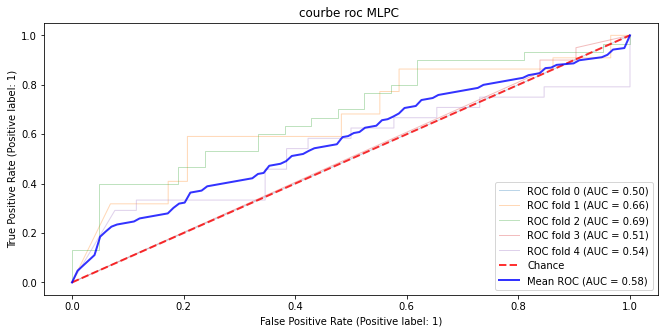

Accuracy: [0.62745098 0.56862745 0.70588235 0.43137255 0.58      ]
moy_accuracy: 0.58
precision: [0.         0.43589744 0.58823529 1.         0.66666667]
moy_precision: 0.54
sensibilité : [0.         0.         0.06666667 1.         0.375     ]
moy_sensibilité: 0.29
spécificité : [0.5        1.         0.38095238 0.         0.96153846]
moy_spécificité: 0.57
MCC : [-0.02974898  0.          0.25354628  0.          0.19871795]
MCC: 0.08
balanced_accuracy : [0.5        0.54780564 0.73809524 0.34193548 0.48076923]
balanced_accuracy: 0.52
roc_auc : [0.54354839 0.57601881 0.5        0.47258065 0.53525641]
roc_auc: 0.53
cohen_kappa_scorec : [0.13813373 0.19175911 0.16393443 0.         0.09240924]
cohen_kappa_scorec: 0.12
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

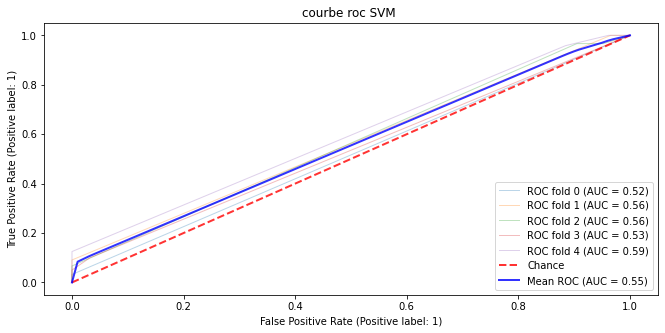

Accuracy: [0.41176471 0.45098039 0.45098039 0.39215686 0.52      ]
moy_accuracy: 0.45
precision: [1.         0.44       1.         0.39215686 0.5       ]
moy_precision: 0.67
sensibilité : [0.03225806 1.         0.06666667 1.         0.95833333]
moy_sensibilité: 0.61
spécificité : [1.         0.03448276 1.         0.         0.11538462]
moy_spécificité: 0.43
MCC : [0.11359237 0.12317635 0.16903085 0.         0.13575525]
MCC: 0.11
balanced_accuracy : [0.51612903 0.51724138 0.53333333 0.5        0.53685897]
balanced_accuracy: 0.52
roc_auc : [0.51612903 0.56112853 0.56031746 0.53467742 0.59294872]
roc_auc: 0.55
cohen_kappa_scorec : [0.02547771 0.0298913  0.05555556 0.         0.07120743]
cohen_kappa_scorec: 0.04


In [13]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe1, Y)):
         clf.fit( x_rfe1.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe1.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe1, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe1, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe1, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe1, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe1, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# 11 kfold

In [14]:
rfecv2= RFECV(GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=1, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),cv=StratifiedKFold(11))
rfecv2.fit(X,Y)
# check the support
rfecv2.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False,  True, False,
        True,  True,

In [15]:
# name wise features and count
feature_selected2 =  X.columns[rfecv2.get_support()]
feature_selected2

Index(['Ovins', 'Equides', 'Arbrisseau', 'Pl_herb', 'ZoneUrbaine', 'Amp2_IRM',
       'Min_IRM', 'Ph1_IRM', 'Amp1_TempJ', 'Max_TempJ', 'Moy_TempN',
       'Amp1_TempN', 'Amp3_TempN', 'Min_TempN', 'Max_TempN', 'Ph3_TempN',
       'VarT_ann_NDVI', 'VarT_bi_NDVI', 'Ph2_NDVI', 'Var_NDVI', 'Moy_EVI',
       'Amp2_EVI', 'Var_EVI', 'ProfAbs_Sub', 'Sol_Carbone_stock', 'Sol_pH_KCL',
       'Sol_Sable', 'Elev_Max', 'Elev_sd', 'Pente_Max', 'Pente_Min',
       'Pente_sd', 'IPT_Max', 'IPT_Med', 'IR_Max', 'IR_Min', 'IR_Moy', 'IR_sd',
       'RV_Med', 'RV_Min', 'RV_Moy', 'Bio_Tmin', 'Bio_Tsec_Moy', 'Bio_Tch_Moy',
       'Bio_Pre_Ann', 'Prec_Oct', 'Rad_Fev', 'Rad_Mars', 'Rad_Mai',
       'Rad_Juill', 'Tmax_Fev', 'Tmax_Mars', 'Tmax_Avril', 'Tmax_Mai',
       'Tmax_Aout', 'Tmax_Oct', 'Tmin_Juin', 'Tmin_Juill', 'Vap_Mars',
       'Vap_Juin', 'Vent_Fev', 'Vent_Juin', 'Vent_Juill', 'Vent_Dec'],
      dtype='object')

In [18]:
 x_rfe2=X[feature_selected2]

In [19]:
 x_rfe2

,Ovins,Equides,Arbrisseau,Pl_herb,ZoneUrbaine,Amp2_IRM,Min_IRM,Ph1_IRM,Amp1_TempJ,Max_TempJ,Moy_TempN,Amp1_TempN,Amp3_TempN,Min_TempN,Max_TempN,Ph3_TempN,VarT_ann_NDVI,VarT_bi_NDVI,Ph2_NDVI,Var_NDVI,Moy_EVI,Amp2_EVI,Var_EVI,ProfAbs_Sub,Sol_Carbone_stock,Sol_pH_KCL,Sol_Sable,Elev_Max,Elev_sd,Pente_Max,Pente_Min,Pente_sd,IPT_Max,IPT_Med,IR_Max,IR_Min,IR_Moy,IR_sd,RV_Med,RV_Min,RV_Moy,Bio_Tmin,Bio_Tsec_Moy,Bio_Tch_Moy,Bio_Pre_Ann,Prec_Oct,Rad_Fev,Rad_Mars,Rad_Mai,Rad_Juill,Tmax_Fev,Tmax_Mars,Tmax_Avril,Tmax_Mai,Tmax_Aout,Tmax_Oct,Tmin_Juin,Tmin_Juill,Vap_Mars,Vap_Juin,Vent_Fev,Vent_Juin,Vent_Juill,Vent_Dec
0,0.000000,0.624435,0,0,0,110,2690,566,96,15012,14436,102,5,14309,14561,151,2,1,208,7,2906,48,1,4143,11.916667,63.416667,64.833333,11,0.768013,1.043530,0.123749,0.308601,2.875,-0.1875,3.375,0.625,1.968750,0.899761,0.000025,0.000009,0.000033,14.5,19.866667,22.600000,48,3,17773,21276,24920,23739,21.799999,22.700001,22.600000,23.200001,26.200001,26.000000,17.299999,18.000000,1.55,1.91,5.6,7.1,7.5,4.9
1,0.034352,0.040295,0,0,0,10,3350,581,312,15609,14516,176,18,14311,14705,104,13,1,240,1,2596,16,0,1828,4.916667,66.416667,52.583333,77,0.484123,0.526827,0.043752,0.110143,2.000,-0.5000,2.125,0.875,1.375000,0.397748,0.000006,0.000002,0.000008,12.0,22.166667,24.266667,29,3,16620,19997,24082,23135,22.600000,24.000000,24.600000,25.500000,29.700001,27.600000,17.299999,18.799999,1.42,1.84,4.1,6.4,5.9,3.8
2,0.034352,0.040295,0,0,0,10,3350,581,312,15609,14516,176,18,14311,14705,104,13,1,240,1,2596,16,0,1828,4.916667,66.416667,52.583333,77,0.484123,0.526827,0.043752,0.110143,2.000,-0.5000,2.125,0.875,1.375000,0.397748,0.000006,0.000002,0.000008,12.0,22.166667,24.266667,29,3,16620,19997,24082,23135,22.600000,24.000000,24.600000,25.500000,29.700001,27.600000,17.299999,18.799999,1.42,1.84,4.1,6.4,5.9,3.8
3,0.000000,0.269410,0,0,0,40,2930,600,306,15502,14512,160,21,14315,14690,109,8,0,367,1,2578,7,0,0,6.333333,65.083333,51.083333,79,1.899835,3.763592,1.057192,0.739932,9.500,1.5625,11.750,6.000,9.304688,1.639937,0.000175,0.000054,0.000185,12.3,24.383334,24.383334,27,3,16659,20010,24019,23055,22.600000,24.000000,24.600000,25.500000,29.700001,27.600000,17.600000,19.000000,1.43,1.86,4.5,6.2,6.2,3.9
4,0.000000,0.379107,0,0,0,70,2350,577,295,15560,14526,182,14,14309,14719,112,1,0,213,20,2190,71,35,6537,4.750000,64.666667,73.333333,57,5.418429,4.500561,0.333201,1.371832,4.125,-3.7500,15.125,2.375,7.515625,3.913587,0.000403,0.000150,0.000396,12.4,22.433334,24.500000,26,3,16615,19999,24002,23035,22.799999,24.100000,24.700001,25.700001,29.900000,27.799999,17.700001,19.100000,1.44,1.88,4.2,5.7,6.2,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,15.116930,0.698221,13,0,0,70,880,647,543,15505,14347,294,1,14078,14675,311,52,3,483,100,5253,155,47,0,41.250000,49.916667,45.500000,187,2.090716,8.880978,5.809525,0.879411,26.875,1.3125,28.875,21.500,25.093750,2.176535,0.000837,0.000547,0.001706,9.4,23.433334,23.866667,709,59,11971,15330,23341,26073,15.400000,17.299999,18.900000,21.200001,27.700001,22.100000,18.500000,21.200001,1.20,1.74,4.6,3.9,3.9,4.2
250,0.000000,1.725019,0,0,100,0,1400,593,478,15319,14419,308,4,14120,14743,382,51,5,500,11,3460,85,7,846,25.416667,57.166667,39.083333,82,1.273222,2.983346,0.745026,0.679058,5.375,1.6250,9.500,4.625,6.578125,1.735360,0.000184,0.000052,0.000248,9.6,23.433333,23.800000,801,76,11863,15445,23582,27092,15.500000,17.299999,18.700001,20.900000,27.299999,22.400000,19.400000,21.200001,1.21,1.73,4.3,3.7,3.7,4.0
251,15.054404,0.991284,21,0,0,140,1080,700,452,15318,14364,278,1,14109,14666,30,84,3,478,155,5078,141,70,1729,34.000000,57.416667,41.333333,148,3.655048,6.133211,2.375778,1.037676,19.750,2.2500,24.375,10.125,15.914062,3.989664,0.001003,0.000710,0.001060,9.4,23.416666,23.866666,714,61,11905,15250,23425,2608

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

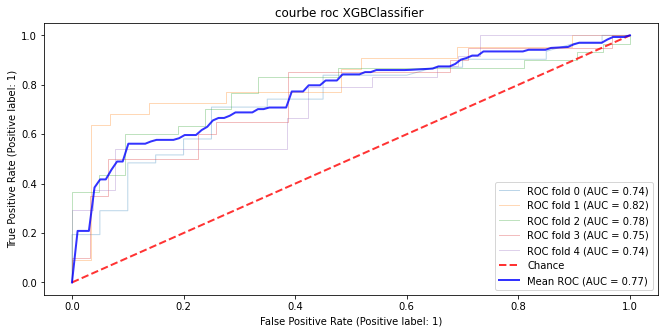

Accuracy: [0.70588235 0.68627451 0.74509804 0.62745098 0.68      ]
moy_accuracy: 0.69
precision: [0.78571429 0.60714286 0.79310345 0.52       0.63333333]
moy_precision: 0.67
sensibilité : [0.70967742 0.77272727 0.76666667 0.65       0.79166667]
moy_sensibilité: 0.74
spécificité : [0.7        0.62068966 0.71428571 0.61290323 0.57692308]
moy_spécificité: 0.64
MCC : [0.4019712  0.39157995 0.47792749 0.25676456 0.37588926]
MCC: 0.38
balanced_accuracy : [0.70483871 0.69670846 0.74047619 0.63145161 0.68429487]
balanced_accuracy: 0.69
roc_auc : [0.74193548 0.81974922 0.77936508 0.7516129  0.74358974]
roc_auc: 0.77
cohen_kappa_scorec : [0.39905734 0.38088012 0.47754137 0.25173745 0.36507937]
cohen_kappa_scorec: 0.37
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

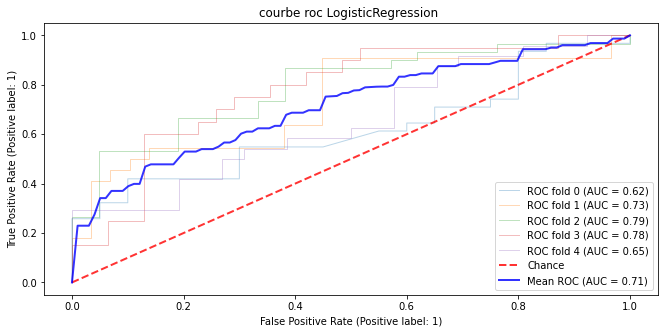

Accuracy: [0.60784314 0.70588235 0.70588235 0.7254902  0.64      ]
moy_accuracy: 0.68
precision: [0.73913043 0.60606061 0.77777778 0.65       0.65      ]
moy_precision: 0.68
sensibilité : [0.5483871  0.90909091 0.7        0.65       0.54166667]
moy_sensibilité: 0.67
spécificité : [0.7        0.55172414 0.71428571 0.77419355 0.73076923]
moy_spécificité: 0.69
MCC : [0.24371482 0.4775774  0.40849122 0.42419355 0.27783119]
MCC: 0.37
balanced_accuracy : [0.62419355 0.73040752 0.70714286 0.71209677 0.63621795]
balanced_accuracy: 0.68
roc_auc : [0.61935484 0.73824451 0.78888889 0.76290323 0.64423077]
roc_auc: 0.71
cohen_kappa_scorec : [0.23192771 0.4345898  0.40559441 0.42419355 0.27419355]
cohen_kappa_scorec: 0.35
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

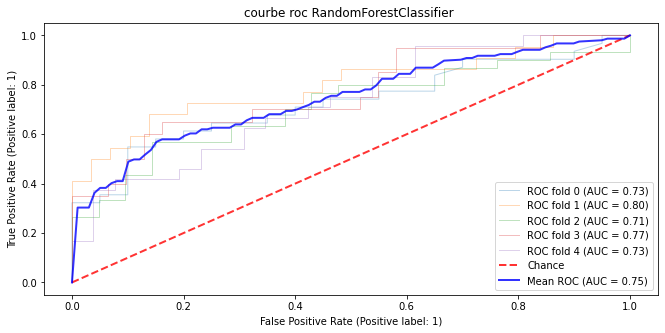

Accuracy: [0.66666667 0.64705882 0.66666667 0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.88888889 0.5625     0.76       0.59090909 0.65217391]
moy_precision: 0.69
sensibilité : [0.51612903 0.81818182 0.63333333 0.65       0.625     ]
moy_sensibilité: 0.65
spécificité : [0.9        0.51724138 0.71428571 0.70967742 0.69230769]
moy_spécificité: 0.71
MCC : [0.4251387  0.3435988  0.34222928 0.3545673  0.31807321]
MCC: 0.36
balanced_accuracy : [0.70806452 0.6677116  0.67380952 0.67983871 0.65865385]
balanced_accuracy: 0.68
roc_auc : [0.72741935 0.79780564 0.71428571 0.76935484 0.72916667]
roc_auc: 0.75
cohen_kappa_scorec : [0.37310195 0.3179792  0.33563218 0.35340729 0.31781701]
cohen_kappa_scorec: 0.34
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

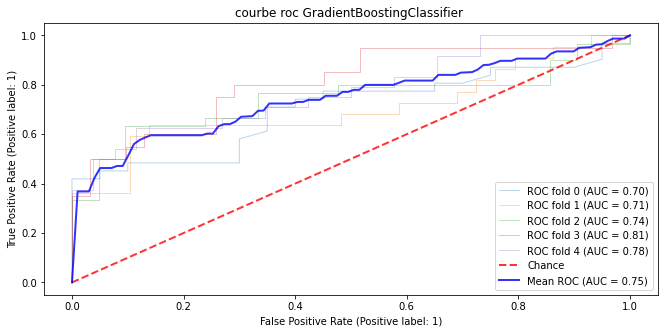

Accuracy: [0.62745098 0.56862745 0.68627451 0.7254902  0.68      ]
moy_accuracy: 0.66
precision: [0.75       0.5        0.79166667 0.625      0.65384615]
moy_precision: 0.66
sensibilité : [0.58064516 0.63636364 0.63333333 0.75       0.70833333]
moy_sensibilité: 0.66
spécificité : [0.7        0.51724138 0.76190476 0.70967742 0.65384615]
moy_spécificité: 0.67
MCC : [0.27451489 0.15288779 0.38971002 0.44963645 0.36217949]
MCC: 0.33
balanced_accuracy : [0.64032258 0.57680251 0.69761905 0.72983871 0.68108974]
balanced_accuracy: 0.67
roc_auc : [0.70241935 0.70532915 0.74285714 0.80806452 0.77884615]
roc_auc: 0.75
cohen_kappa_scorec : [0.2642369  0.14871017 0.37899543 0.44392523 0.36102236]
cohen_kappa_scorec: 0.32
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

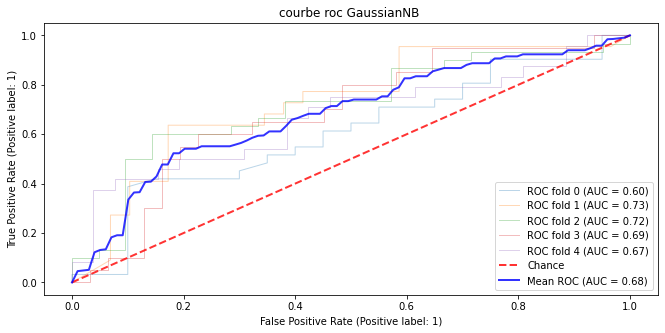

Accuracy: [0.56862745 0.52941176 0.62745098 0.64705882 0.64      ]
moy_accuracy: 0.60
precision: [0.64516129 0.47727273 0.65714286 0.54166667 0.61538462]
moy_precision: 0.59
sensibilité : [0.64516129 0.95454545 0.76666667 0.65       0.66666667]
moy_sensibilité: 0.74
spécificité : [0.45       0.20689655 0.42857143 0.64516129 0.61538462]
moy_spécificité: 0.47
MCC : [0.09516129 0.23235473 0.20708127 0.28871393 0.28205128]
MCC: 0.22
balanced_accuracy : [0.54758065 0.580721   0.59761905 0.64758065 0.64102564]
balanced_accuracy: 0.60
roc_auc : [0.60483871 0.72805643 0.71587302 0.68870968 0.66987179]
roc_auc: 0.68
cohen_kappa_scorec : [0.09516129 0.14405594 0.20246914 0.28504673 0.28115016]
cohen_kappa_scorec: 0.20
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

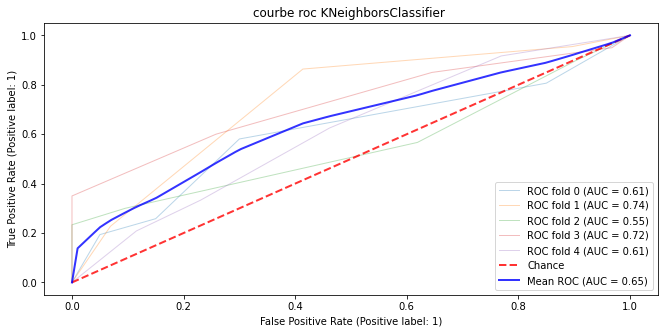

Accuracy: [0.49019608 0.66666667 0.54901961 0.68627451 0.56      ]
moy_accuracy: 0.59
precision: [0.72727273 0.63157895 0.81818182 0.6        0.57142857]
moy_precision: 0.67
sensibilité : [0.25806452 0.54545455 0.3        0.6        0.33333333]
moy_sensibilité: 0.41
spécificité : [0.85       0.75862069 0.9047619  0.74193548 0.76923077]
moy_spécificité: 0.80
MCC : [0.12827813 0.31148677 0.24501524 0.34193548 0.1141228 ]
MCC: 0.23
balanced_accuracy : [0.55403226 0.65203762 0.60238095 0.67096774 0.55128205]
balanced_accuracy: 0.61
roc_auc : [0.60725806 0.73589342 0.55238095 0.725      0.61217949]
roc_auc: 0.65
cohen_kappa_scorec : [0.09178082 0.30916335 0.1802935  0.34193548 0.10423453]
cohen_kappa_scorec: 0.21
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

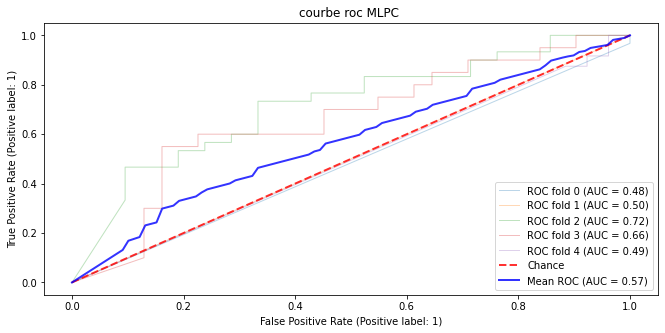

Accuracy: [0.62745098 0.43137255 0.62745098 0.56862745 0.36      ]
moy_accuracy: 0.52
precision: [1.         0.42857143 0.58823529 0.33333333 0.43478261]
moy_precision: 0.56
sensibilité : [0.25806452 0.54545455 0.06666667 0.9        1.        ]
moy_sensibilité: 0.55
spécificité : [0.4        0.24137931 0.23809524 0.         0.69230769]
moy_spécificité: 0.31
MCC : [-0.12558938  0.22050646  0.40694816 -0.09516129 -0.34506043]
MCC: 0.01
balanced_accuracy : [0.48387097 0.60423197 0.33809524 0.50080645 0.53044872]
balanced_accuracy: 0.49
roc_auc : [0.48467742 0.42868339 0.58333333 0.5983871  0.32371795]
roc_auc: 0.48
cohen_kappa_scorec : [ 0.07881773  0.03232607  0.30537634  0.16256158 -0.10759494]
cohen_kappa_scorec: 0.09
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

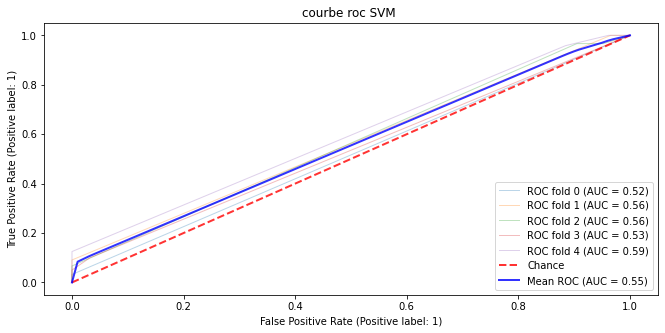

Accuracy: [0.41176471 0.45098039 0.45098039 0.39215686 0.52      ]
moy_accuracy: 0.45
precision: [1.         0.44       1.         0.39215686 0.5       ]
moy_precision: 0.67
sensibilité : [0.03225806 1.         0.06666667 1.         0.95833333]
moy_sensibilité: 0.61
spécificité : [1.         0.03448276 1.         0.         0.11538462]
moy_spécificité: 0.43
MCC : [0.11359237 0.12317635 0.16903085 0.         0.13575525]
MCC: 0.11
balanced_accuracy : [0.51612903 0.51724138 0.53333333 0.5        0.53685897]
balanced_accuracy: 0.52
roc_auc : [0.51612903 0.56112853 0.56031746 0.53467742 0.59294872]
roc_auc: 0.55
cohen_kappa_scorec : [0.02547771 0.0298913  0.05555556 0.         0.07120743]
cohen_kappa_scorec: 0.04


In [20]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe2, Y)):
         clf.fit( x_rfe2.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe2.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe2, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe2, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe2, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe2, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe2, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# 12 kfold

In [21]:
rfecv3= RFECV(GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=1, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),cv=StratifiedKFold(12))
rfecv3.fit(X,Y)
# check the support
rfecv3.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [22]:
# name wise features and count
feature_selected3 =  X.columns[rfecv3.get_support()]
feature_selected3

Index(['Bovins', 'Volaille', 'Caprins', 'Ovins', 'Equides', 'Coniferes',
       'ZoneAride', 'ZonePel', 'Lesfeuillus', 'Caduc',
       ...
       'Vent_Fev', 'Vent_Mars', 'Vent_Avril', 'Vent_Mai', 'Vent_Juin',
       'Vent_Juill', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=204)

In [23]:
 x_rfe3=X[feature_selected3]

In [24]:
 x_rfe3

,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,Min_TempJ,Max_TempJ,Ph1_TempJ,...,Tmax_Avril,Tmax_Mai,Tmax_Juin,Tmax_Juill,Tmax_Aout,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,14721,15012,672,...,22.600000,23.200001,24.299999,25.200001,26.200001,26.500000,26.000000,24.500000,22.500000,14.5,15.7,15.6,16.200001,17.299999,18.000000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.72,1.91,2.07,2.18,2.16,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,6.3,5.4,5.5,4.9
1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,14941,15609,643,...,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.600000,12.0,14.2,14.7,15.700000,17.299999,18.799999,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.62,1.84,2.03,2.10,2.09,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.7,4.3,3.7,3.8
2,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,14941,15609,643,...,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.600000,12.0,14.2,14.7,15.700000,17.299999,18.799999,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.62,1.84,2.03,2.10,2.09,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.7,4.3,3.7,3.8
3,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,14854,15502,636,...,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.700001,12.3,14.4,15.0,16.000000,17.600000,19.000000,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.64,1.86,2.04,2.12,2.10,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,5.7,4.1,3.7,3.9
4,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,14918,15560,651,...,24.700001,25.700001,27.299999,28.700001,29.900000,29.400000,27.799999,25.299999,22.900000,12.4,14.6,15.2,16.100000,17.700001,19.100000,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.65,1.88,2.07,2.14,2.13,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,14387,15505,670,...,18.900000,21.200001,24.299999,27.200001,27.700001,25.700001,22.100000,18.700001,16.500000,9.4,11.5,13.1,15.400000,18.500000,21.200001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.47,1.74,1.96,2.07,1.93,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.0,4.0,4.0,4.2
250,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,95,14350,15319,655,...,18.700001,20.900000,24.200001,26.799999,27.299999,25.700001,22.400000,19.000000,16.100000,9.6,12.4,13.9,16.000000,19.400000,21.200001,20.100000,16.799999,13.400000,10.5,1.10,1

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

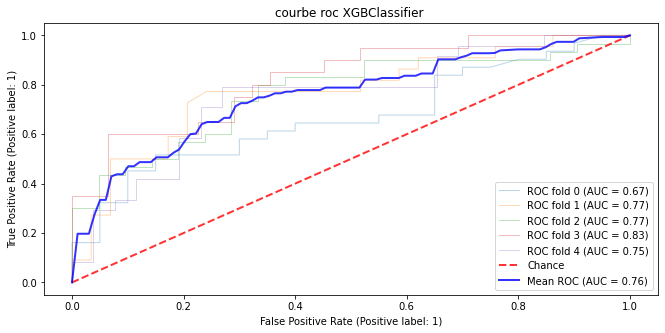

Accuracy: [0.60784314 0.62745098 0.7254902  0.7254902  0.74      ]
moy_accuracy: 0.69
precision: [0.73913043 0.5483871  0.75       0.625      0.7037037 ]
moy_precision: 0.67
sensibilité : [0.5483871  0.77272727 0.8        0.75       0.79166667]
moy_sensibilité: 0.73
spécificité : [0.7        0.51724138 0.61904762 0.70967742 0.69230769]
moy_spécificité: 0.65
MCC : [0.24371482 0.29414776 0.4265617  0.44963645 0.48514197]
MCC: 0.38
balanced_accuracy : [0.62419355 0.64498433 0.70952381 0.72983871 0.74198718]
balanced_accuracy: 0.69
roc_auc : [0.66935484 0.77194357 0.76507937 0.82580645 0.75      ]
roc_auc: 0.76
cohen_kappa_scorec : [0.23192771 0.27632562 0.42512077 0.44392523 0.48165869]
cohen_kappa_scorec: 0.37
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

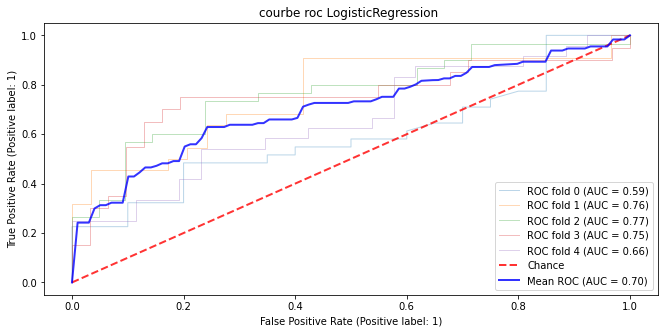

Accuracy: [0.56862745 0.70588235 0.7254902  0.70588235 0.66      ]
moy_accuracy: 0.67
precision: [0.69565217 0.60606061 0.76666667 0.66666667 0.68421053]
moy_precision: 0.68
sensibilité : [0.51612903 0.90909091 0.76666667 0.5        0.54166667]
moy_sensibilité: 0.65
spécificité : [0.65       0.55172414 0.66666667 0.83870968 0.76923077]
moy_spécificité: 0.70
MCC : [0.16300407 0.4775774  0.43333333 0.36293309 0.32000133]
MCC: 0.35
balanced_accuracy : [0.58306452 0.73040752 0.71666667 0.66935484 0.65544872]
balanced_accuracy: 0.67
roc_auc : [0.59193548 0.76018809 0.76825397 0.75483871 0.6875    ]
roc_auc: 0.71
cohen_kappa_scorec : [0.15512048 0.4345898  0.43333333 0.35443038 0.31340872]
cohen_kappa_scorec: 0.34
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

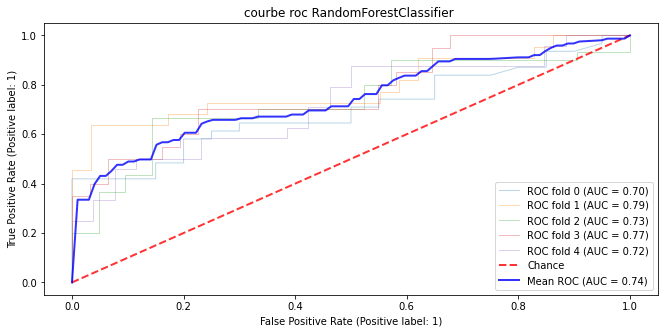

Accuracy: [0.58823529 0.60784314 0.68627451 0.70588235 0.62      ]
moy_accuracy: 0.64
precision: [0.8125     0.53333333 0.76923077 0.60869565 0.6       ]
moy_precision: 0.66
sensibilité : [0.41935484 0.72727273 0.66666667 0.7        0.625     ]
moy_sensibilité: 0.63
spécificité : [0.85       0.51724138 0.71428571 0.70967742 0.61538462]
moy_spécificité: 0.68
MCC : [0.28341747 0.24606168 0.37504578 0.4019712  0.24019223]
MCC: 0.31
balanced_accuracy : [0.63467742 0.62225705 0.69047619 0.70483871 0.62019231]
balanced_accuracy: 0.65
roc_auc : [0.7        0.78996865 0.73492063 0.76935484 0.72435897]
roc_auc: 0.74
cohen_kappa_scorec : [0.23772242 0.23423423 0.37037037 0.39905734 0.24      ]
cohen_kappa_scorec: 0.30
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

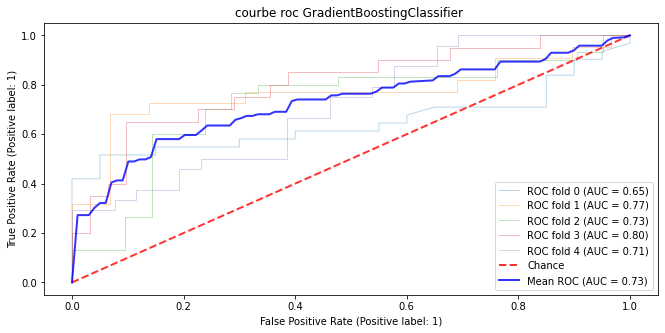

Accuracy: [0.64705882 0.66666667 0.70588235 0.68627451 0.62      ]
moy_accuracy: 0.67
precision: [0.84210526 0.5862069  0.8        0.57692308 0.6       ]
moy_precision: 0.68
sensibilité : [0.51612903 0.77272727 0.66666667 0.75       0.625     ]
moy_sensibilité: 0.67
spécificité : [0.85       0.5862069  0.76190476 0.64516129 0.61538462]
moy_spécificité: 0.69
MCC : [0.36972449 0.35893417 0.42192651 0.38593446 0.24019223]
MCC: 0.36
balanced_accuracy : [0.68306452 0.67946708 0.71428571 0.69758065 0.62019231]
balanced_accuracy: 0.68
roc_auc : [0.6483871  0.76959248 0.72539683 0.8016129  0.7099359 ]
roc_auc: 0.73
cohen_kappa_scorec : [0.33090379 0.34566038 0.4137931  0.37519142 0.24      ]
cohen_kappa_scorec: 0.34
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

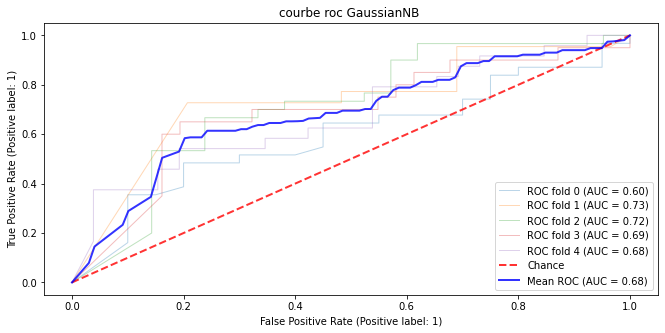

Accuracy: [0.58823529 0.56862745 0.64705882 0.60784314 0.62      ]
moy_accuracy: 0.61
precision: [0.66666667 0.5        0.67647059 0.5        0.60869565]
moy_precision: 0.59
sensibilité : [0.64516129 0.95454545 0.76666667 0.7        0.58333333]
moy_sensibilité: 0.73
spécificité : [0.5        0.27586207 0.47619048 0.5483871  0.65384615]
moy_spécificité: 0.49
MCC : [0.14400461 0.29933748 0.25354628 0.24371482 0.23775169]
MCC: 0.24
balanced_accuracy : [0.57258065 0.61520376 0.62142857 0.62419355 0.61858974]
balanced_accuracy: 0.61
roc_auc : [0.59516129 0.73275862 0.71587302 0.69112903 0.67788462]
roc_auc: 0.68
cohen_kappa_scorec : [0.14388489 0.20762712 0.25       0.23192771 0.23756019]
cohen_kappa_scorec: 0.21
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

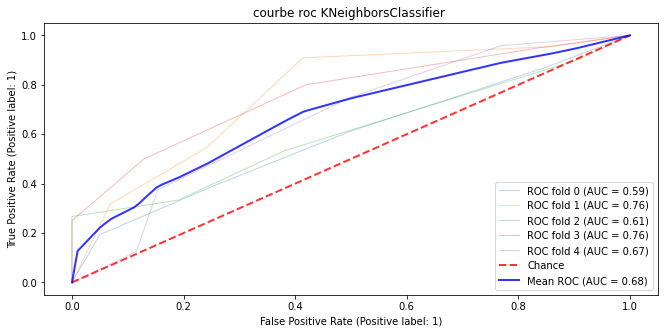

Accuracy: [0.52941176 0.66666667 0.52941176 0.7254902  0.62      ]
moy_accuracy: 0.61
precision: [0.70588235 0.63157895 0.71428571 0.71428571 0.69230769]
moy_precision: 0.69
sensibilité : [0.38709677 0.54545455 0.33333333 0.5        0.375     ]
moy_sensibilité: 0.43
spécificité : [0.75       0.75862069 0.80952381 0.87096774 0.84615385]
moy_spécificité: 0.81
MCC : [0.14199046 0.31148677 0.15754599 0.40585146 0.25189193]
MCC: 0.25
balanced_accuracy : [0.56854839 0.65203762 0.57142857 0.68548387 0.61057692]
balanced_accuracy: 0.62
roc_auc : [0.58790323 0.76332288 0.60555556 0.76129032 0.66746795]
roc_auc: 0.68
cohen_kappa_scorec : [0.12195122 0.30916335 0.12820513 0.39182283 0.22512235]
cohen_kappa_scorec: 0.24
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

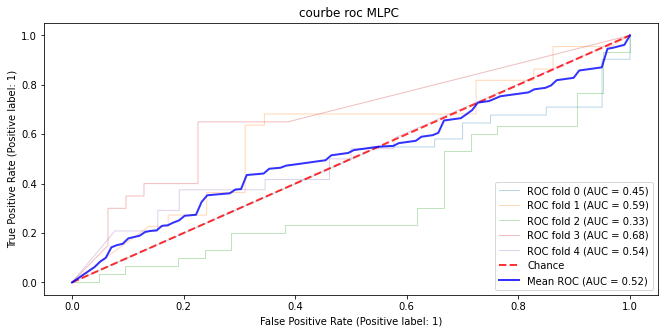

Accuracy: [0.60784314 0.45098039 0.43137255 0.60784314 0.52      ]
moy_accuracy: 0.52
precision: [0.6        0.42857143 0.         0.4        0.61111111]
moy_precision: 0.41
sensibilité : [0.93548387 0.95454545 0.13333333 0.5        0.25      ]
moy_sensibilité: 0.55
spécificité : [0.35       0.93103448 0.         0.09677419 0.69230769]
moy_spécificité: 0.41
MCC : [ 0.03746107  0.07228181 -0.23659777  0.32245101 -0.09172492]
MCC: 0.02
balanced_accuracy : [0.5        0.53683386 0.43333333 0.51370968 0.5       ]
balanced_accuracy: 0.50
roc_auc : [0.41612903 0.57915361 0.5        0.61612903 0.43669872]
roc_auc: 0.51
cohen_kappa_scorec : [-0.03879728 -0.09509202  0.          0.02111324  0.28571429]
cohen_kappa_scorec: 0.03
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

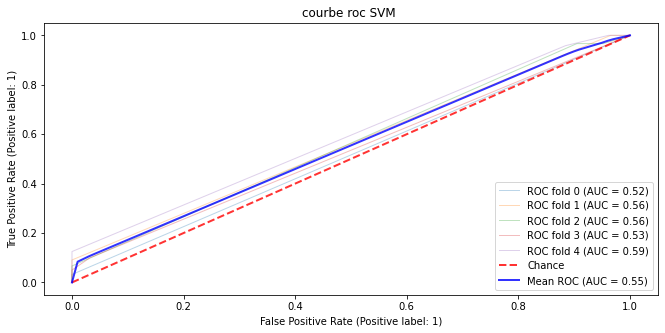

Accuracy: [0.41176471 0.45098039 0.45098039 0.39215686 0.52      ]
moy_accuracy: 0.45
precision: [1.         0.44       1.         0.39215686 0.5       ]
moy_precision: 0.67
sensibilité : [0.03225806 1.         0.06666667 1.         0.95833333]
moy_sensibilité: 0.61
spécificité : [1.         0.03448276 1.         0.         0.11538462]
moy_spécificité: 0.43
MCC : [0.11359237 0.12317635 0.16903085 0.         0.13575525]
MCC: 0.11
balanced_accuracy : [0.51612903 0.51724138 0.53333333 0.5        0.53685897]
balanced_accuracy: 0.52
roc_auc : [0.51612903 0.56112853 0.56031746 0.53467742 0.59294872]
roc_auc: 0.55
cohen_kappa_scorec : [0.02547771 0.0298913  0.05555556 0.         0.07120743]
cohen_kappa_scorec: 0.04


In [26]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe3, Y)):
         clf.fit( x_rfe3.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe3.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe3, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe3, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe3, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe3, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe3, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))